## 1. Import and Preview Data Set

In [15]:
import pandas as pd

# Read csv file
read_file = pd.read_csv(r"C:\Users\trant\OneDrive\Documents\MIT_DA_Tri2_2023\Applied Data Mining\itineraries-t10stns.csv")
df = pd.DataFrame(read_file)

# Preview data
df.head()


,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,...,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,16/4/2022,17/4/2022,ATL,BOS,PT2H29M,0,False,False,True,217.67,...,947.00,2022-04-17T12:57:00.000-04:00,2022-04-17T15:26:00.000-04:00,BOS,ATL,DL,Airbus A321,8940,947,coach
1,16/4/2022,17/4/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,...,947.00,2022-04-17T06:30:00.000-04:00,2022-04-17T09:00:00.000-04:00,BOS,ATL,DL,Airbus A321,9000,947,coach
2,16/4/2022,17/4/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,...,947.00,2022-04-17T11:35:00.000-04:00,2022-04-17T14:05:00.000-04:00,BOS,ATL,DL,Boeing 757-200,9000,947,coach
3,16/4/2022,17/4/2022,ATL,BOS,PT2H32M,0,False,False,True,217.67,...,947.00,2022-04-17T13:59:00.000-04:00,2022-04-17T16:31:00.000-04:00,BOS,ATL,DL,Airbus A321,9120,947,coach
4,16/4/2022,17/4/2022,ATL,BOS,PT2H34M,0,False,False,True,217.67,...,947.00,2022-04-17T09:59:00.000-04:00,2022-04-17T12:33:00.000-04:00,BOS,ATL,DL,Airbus A321,9240,947,coach


## 2. Data Description

In this part, we will check the number of the data samples, the types of attributes, and the statistical information of each attribute.

In [16]:
# Check the data info
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   searchDate                    1048575 non-null  object 
 1   flightDate                    1048575 non-null  object 
 2   startingAirport               1048575 non-null  object 
 3   destinationAirport            1048575 non-null  object 
 4   travelDuration                1048575 non-null  object 
 5   elapsedDays                   1048575 non-null  int64  
 6   isBasicEconomy                1048575 non-null  bool   
 7   isRefundable                  1048575 non-null  bool   
 8   isNonStop                     1048575 non-null  bool   
 9   baseFare                      1048575 non-null  float64
 10  totalFare                     1048575 non-null  float64
 11  seatsRemaining                1048575 non-null  int64  
 12  totalTravelDistance         

searchDate                          0
flightDate                          0
startingAirport                     0
destinationAirport                  0
travelDuration                      0
elapsedDays                         0
isBasicEconomy                      0
isRefundable                        0
isNonStop                           0
baseFare                            0
totalFare                           0
seatsRemaining                      0
totalTravelDistance             64754
segmentsDepartureTimeRaw            0
segmentsArrivalTimeRaw              0
segmentsArrivalAirportCode          0
segmentsDepartureAirportCode        0
segmentsAirlineCode                 0
segmentsEquipmentDescription    19696
segmentsDurationInSeconds           0
segmentsDistance                 8129
segmentsCabinCode                   0
dtype: int64

The results reveal the presence of missing data that require processing.

In [17]:
# Describe the statistical information of each attribute with custom formatting
pd.set_option('display.float_format', '{:.2f}'.format)
description = df.describe()
description

,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance
count,1048575.00,1048575.00,1048575.00,1048575.00,983821.00
mean,0.15,301.26,349.44,5.66,1578.13
std,0.35,219.49,235.62,2.95,836.63
min,0.00,5.10,23.97,0.00,97.00
25%,0.00,161.86,198.60,3.00,872.00
50%,0.00,264.19,308.60,7.00,1398.00
75%,0.00,392.55,447.10,8.00,2353.00
max,2.00,3531.16,3810.60,10.00,7000.00


## 3. Pre-processing Data

In this section, we address not only the handling of missing and noisy data but also the refinement of data types and formatting issues, making the data more suitable and ready for the subsequent application of algorithms.

### 3.1. Detecting & processing outliers

Upon examining the 'Total Travel Distance' column, it is evident that while the mean is 1578.13 and 75% of the data falls below 2353, an outlier exists with a maximum value of 7000. This suggests the presence of outliers in the dataset. To address this, we will employ the IQR (Interquartile Range) Method for outlier detection and subsequently replace the detected outliers with the mean value of the dataset.

In [18]:
# Calculate Q1 and Q3
Q1 = df['totalTravelDistance'].quantile(0.25)
Q3 = df['totalTravelDistance'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['totalTravelDistance'] < LB) | (df['totalTravelDistance'] > UB)

# Replace outliers with the median value
median_value = df['totalTravelDistance'].median()
df.loc[outliers, 'totalTravelDistance'] = median_value

# Check for outliers
df.describe()


,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance
count,1048575.00,1048575.00,1048575.00,1048575.00,983821.00
mean,0.15,301.26,349.44,5.66,1578.12
std,0.35,219.49,235.62,2.95,836.60
min,0.00,5.10,23.97,0.00,97.00
25%,0.00,161.86,198.60,3.00,872.00
50%,0.00,264.19,308.60,7.00,1398.00
75%,0.00,392.55,447.10,8.00,2353.00
max,2.00,3531.16,3810.60,10.00,3958.00


### 3.2. Date & time formatting

In the initial dataset, date and time information follows the ISO 8601 standard (e.g., 2022-04-17T12:57:00.000-04:00). To extract meaningful insights, we will separate and extract the date, time, timezone, and day of the week into individual columns.

In [19]:
# CONVERT ISO 8601 DATE & TIME FORMAT TO NORMAL "DATE-TIME-TIMEZONE-DAY OF WEEK" FROMAT ----

from datetime import datetime as dt

# Function to extract components and create new columns
def extract_datetime_info(iso_datetime_str):
    # Split the concatenated datetime strings using "||" as separators
    datetime_str_list = iso_datetime_str.split("||")
    
    # Initialize lists to store extracted components
    dates = []
    times = []
    timezone_offsets = []
    days_of_week = []
    
    # Process each datetime string separately
    for datetime_str in datetime_str_list:
        iso_datetime = dt.fromisoformat(datetime_str)
        
        # Convert date, time, and day of the week to regular strings
        dates.append(str(iso_datetime.date()))
        times.append(str(iso_datetime.time()))
        days_of_week.append(iso_datetime.strftime("%A"))
        
        # Convert the timezone offset to a numeric value in hours
        timezone_offset_hours = iso_datetime.utcoffset().total_seconds() / 3600
        timezone_offsets.append(timezone_offset_hours)
    
    return dates, times, timezone_offsets, days_of_week

# Apply the function to the 'segmentsDepartureTimeRaw' column
df[['Dates', 'Times', 'Timezone Offsets', 'Day of Week']] = df['segmentsDepartureTimeRaw'].apply(extract_datetime_info).apply(lambda x: pd.Series([x[0][0], x[1][0], x[2][0], x[3][0]]))

df.head()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,...,segmentsDepartureAirportCode,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,Dates,Times,Timezone Offsets,Day of Week
0,16/4/2022,17/4/2022,ATL,BOS,PT2H29M,0,False,False,True,217.67,...,ATL,DL,Airbus A321,8940,947,coach,2022-04-17,12:57:00,-4.00,Sunday
1,16/4/2022,17/4/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,...,ATL,DL,Airbus A321,9000,947,coach,2022-04-17,06:30:00,-4.00,Sunday
2,16/4/2022,17/4/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,...,ATL,DL,Boeing 757-200,9000,947,coach,2022-04-17,11:35:00,-4.00,Sunday
3,16/4/2022,17/4/2022,ATL,BOS,PT2H32M,0,False,False,True,217.67,...,ATL,DL,Airbus A321,9120,947,coach,2022-04-17,13:59:00,-4.00,Sunday
4,16/4/2022,17/4/2022,ATL,BOS,PT2H34M,0,False,False,True,217.67,...,ATL,DL,Airbus A321,9240,947,coach,2022-04-17,09:59:00,-4.00,Sunday


### 3.3. Time duration formatting

In the original dataset, time durations are represented in string format (e.g., PT2H29M, P1DT12M). In this section, our objective is to convert these strings into numeric values that reflect the total number of days, hours, and minutes for each flight. This transformation will enable us to extract more valuable information from the data.

In [20]:
# CONVERT TRAVEL DURATION FROM STRING TO NUMERIC

import re

# Function to convert duration strings to total days, total hours, and total minutes
def convert_duration(duration_str):
    # Define regular expressions to extract days, hours, and minutes
    days_pattern = r'(\d+)D'
    hours_pattern = r'(\d+)H'
    minutes_pattern = r'(\d+)M'
    
    # Initialize variables to store total days, total hours, and total minutes
    total_days = 0
    total_hours = 0
    total_minutes = 0
    
    # Extract and sum total days
    days_match = re.search(days_pattern, duration_str)
    if days_match:
        total_days += int(days_match.group(1))
    
    # Extract and sum total hours
    hours_match = re.search(hours_pattern, duration_str)
    if hours_match:
        total_hours += int(hours_match.group(1))
    
    # Extract and sum total minutes
    minutes_match = re.search(minutes_pattern, duration_str)
    if minutes_match:
        total_minutes += int(minutes_match.group(1))
    
    return total_days, total_hours, total_minutes

# Apply the function to the 'travelDuration' column
df[['Total Days', 'Total Hours', 'Total Minutes']] = df['travelDuration'].apply(convert_duration).apply(pd.Series)

df.head()


,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,...,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,Dates,Times,Timezone Offsets,Day of Week,Total Days,Total Hours,Total Minutes
0,16/4/2022,17/4/2022,ATL,BOS,PT2H29M,0,False,False,True,217.67,...,8940,947,coach,2022-04-17,12:57:00,-4.00,Sunday,0,2,29
1,16/4/2022,17/4/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,...,9000,947,coach,2022-04-17,06:30:00,-4.00,Sunday,0,2,30
2,16/4/2022,17/4/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,...,9000,947,coach,2022-04-17,11:35:00,-4.00,Sunday,0,2,30
3,16/4/2022,17/4/2022,ATL,BOS,PT2H32M,0,False,False,True,217.67,...,9120,947,coach,2022-04-17,13:59:00,-4.00,Sunday,0,2,32
4,16/4/2022,17/4/2022,ATL,BOS,PT2H34M,0,False,False,True,217.67,...,9240,947,coach,2022-04-17,09:59:00,-4.00,Sunday,0,2,34


### 3.4. Fill in missing data

As previously noted, there are instances of missing data within this dataset. In the next step, we will employ regression method to identify the most probable values that can be used to populate these missing data points.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Separate data into features (X) and target variable (y)
X = df[['Total Days', 'Total Hours','Total Minutes']]  # Features are columns 'Total Days', 'Total Hours' and 'Total Minutes'
y = df['totalTravelDistance']  # Target variable is 'totalTravelDistance'

# Create a Linear Regression model
regression_model = LinearRegression()

# Check if there are any missing values in the target variable
if y.isnull().any():
    # Impute missing values in the target variable using mean imputation
    imputer = SimpleImputer(strategy='mean')
    y = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape to a 2D array

# Fit the regression model to the data
regression_model.fit(X, y)

# Predict missing values using the regression model
missing_values = df[df['totalTravelDistance'].isnull()][['Total Days', 'Total Hours','Total Minutes']]
predicted_values = regression_model.predict(missing_values)

# Fill missing values in the original DataFrame with the predicted values
df.loc[df['totalTravelDistance'].isnull(), 'totalTravelDistance'] = predicted_values

df.head()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,...,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,Dates,Times,Timezone Offsets,Day of Week,Total Days,Total Hours,Total Minutes
0,16/4/2022,17/4/2022,ATL,BOS,PT2H29M,0,False,False,True,217.67,...,8940,947,coach,2022-04-17,12:57:00,-4.00,Sunday,0,2,29
1,16/4/2022,17/4/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,...,9000,947,coach,2022-04-17,06:30:00,-4.00,Sunday,0,2,30
2,16/4/2022,17/4/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,...,9000,947,coach,2022-04-17,11:35:00,-4.00,Sunday,0,2,30
3,16/4/2022,17/4/2022,ATL,BOS,PT2H32M,0,False,False,True,217.67,...,9120,947,coach,2022-04-17,13:59:00,-4.00,Sunday,0,2,32
4,16/4/2022,17/4/2022,ATL,BOS,PT2H34M,0,False,False,True,217.67,...,9240,947,coach,2022-04-17,09:59:00,-4.00,Sunday,0,2,34


### 3.4. Check processed data

There might still be some missing data in two columns of the data frame. However, since we have no intention of utilizing this information in our subsequent algorithmic processes, we have opted not to address these missing values. For all the attributes we intend to utilize in our upcoming steps, the data has been thoroughly cleaned.

In [22]:
df.isnull().sum()

searchDate                          0
flightDate                          0
startingAirport                     0
destinationAirport                  0
travelDuration                      0
elapsedDays                         0
isBasicEconomy                      0
isRefundable                        0
isNonStop                           0
baseFare                            0
totalFare                           0
seatsRemaining                      0
totalTravelDistance                 0
segmentsDepartureTimeRaw            0
segmentsArrivalTimeRaw              0
segmentsArrivalAirportCode          0
segmentsDepartureAirportCode        0
segmentsAirlineCode                 0
segmentsEquipmentDescription    19696
segmentsDurationInSeconds           0
segmentsDistance                 8129
segmentsCabinCode                   0
Dates                               0
Times                               0
Timezone Offsets                    0
Day of Week                         0
Total Days  

In [23]:
df.describe()

,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance,Timezone Offsets,Total Days,Total Hours,Total Minutes
count,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,0.15,301.26,349.44,5.66,1598.96,-4.87,0.00,6.50,29.02
std,0.35,219.49,235.62,2.95,825.97,1.21,0.01,3.65,17.20
min,0.00,5.10,23.97,0.00,97.00,-7.00,0.00,0.00,0.00
25%,0.00,161.86,198.60,3.00,905.00,-6.00,0.00,4.00,14.00
50%,0.00,264.19,308.60,7.00,1477.00,-4.00,0.00,6.00,29.00
75%,0.00,392.55,447.10,8.00,2345.00,-4.00,0.00,9.00,44.00
max,2.00,3531.16,3810.60,10.00,4004.00,-4.00,1.00,23.00,59.00


In [29]:
# Save the processed DataFrame as a CSV file
df.to_csv("processed_flight_data.csv", index=False)

## 4. Data Visualization

### 4.1. Flight Fares (Base & Total)

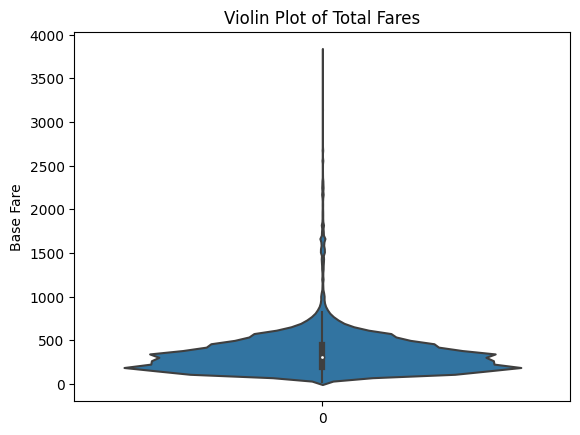

In [30]:
# Violin Plot (Seaborn)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(df['totalFare'])

# Add labels and title
plt.ylabel('Base Fare')
plt.title('Violin Plot of Total Fares')

# Show the plot
plt.show()


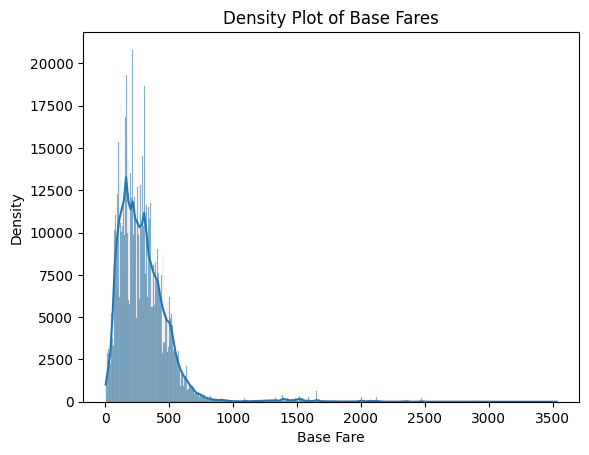

In [31]:
# Density Plot (Seaborn)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a density plot
sns.histplot(df['baseFare'], kde=True)

# Add labels and title
plt.xlabel('Base Fare')
plt.ylabel('Density')
plt.title('Density Plot of Base Fares')

# Show the plot
plt.show()

### 4.2. Total Travel Distance of Flight Routes

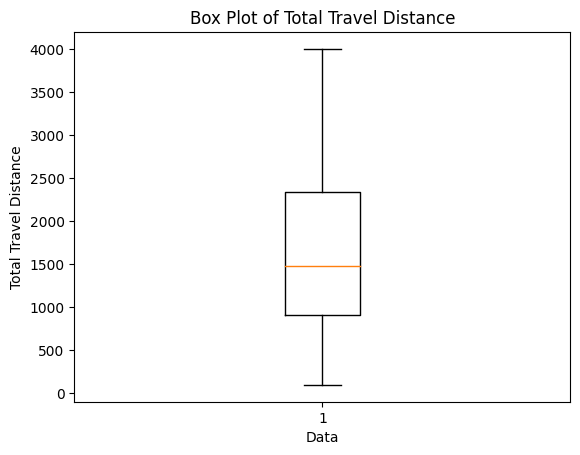

In [32]:
# Box Plot (Matplotlib)

# Create a box plot for the selected column
plt.boxplot(df['totalTravelDistance'])

# Add title and labels
plt.title(f"Box Plot of Total Travel Distance")
plt.xlabel("Data")
plt.ylabel("Total Travel Distance")

# Show the plot
plt.show()

### 4.3. Flight Frequency from Different Airports

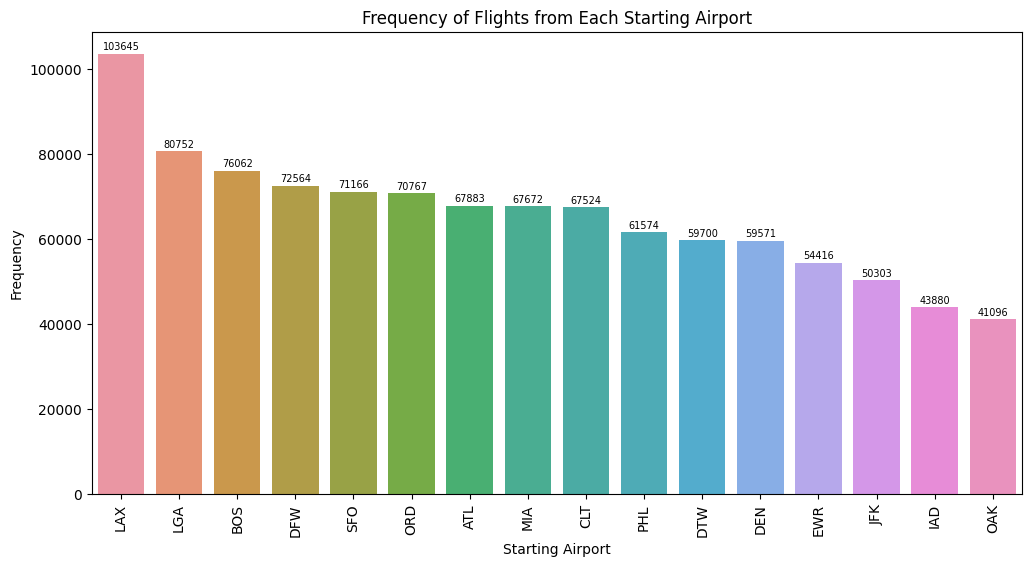

In [33]:
# DEPARTURE AIRPORTS ----

# Countplot (Seaborn)

import matplotlib.pyplot as plt
import seaborn as sns

# Create a countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='startingAirport', order=df['startingAirport'].value_counts().index)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Add rounded data labels above the bars
for p in ax.patches:
    count = p.get_height()
    rounded_count = round(count)  # Round the count to the nearest whole number
    ax.annotate(f'{rounded_count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=7, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel('Starting Airport')
plt.ylabel('Frequency')
plt.title('Frequency of Flights from Each Starting Airport')

# Show the plot
plt.show()


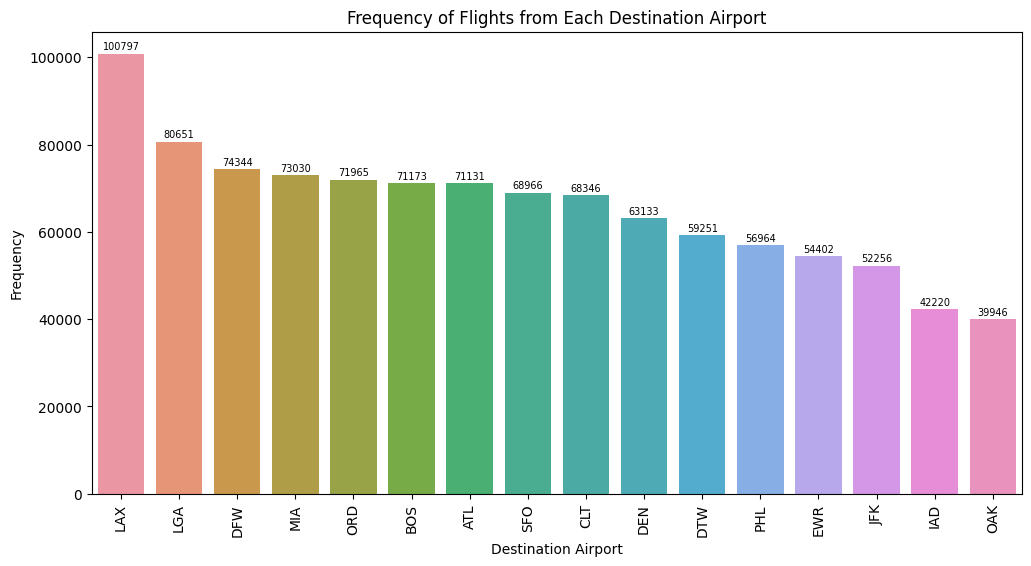

In [34]:
# ARRIVAL AIRPORTS ----

# Countplot (Seaborn)

import matplotlib.pyplot as plt
import seaborn as sns

# Create a countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='destinationAirport', order=df['destinationAirport'].value_counts().index)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Add rounded data labels above the bars
for p in ax.patches:
    count = p.get_height()
    rounded_count = round(count)  # Round the count to the nearest whole number
    ax.annotate(f'{rounded_count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=7, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel('Destination Airport')
plt.ylabel('Frequency')
plt.title('Frequency of Flights from Each Destination Airport')

# Show the plot
plt.show()